In [274]:
import pandas as pd
df = pd.read_csv('insurance-cost.csv')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [277]:
df.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

# TERDAPAT 2 MISSING VALUES PADA BMI DAN SMOKER

In [278]:
m1 = (df['sex'] == 'male') 
m2 = (df['sex'] == 'female')

# MENGISI DATA BMI YANG KOSONG DENGAN MEAN

In [279]:
df[df['bmi'].isnull()]

,age,sex,bmi,children,smoker,region,charges
30,22,male,NaN,0,yes,southwest,35585.5760
51,21,female,NaN,2,no,northwest,3579.8287


In [280]:
df.loc[m1,'bmi'] = df.loc[m1,'bmi'].fillna(df.loc[m1,'bmi'].mean())
df.loc[m2,'bmi'] = df.loc[m2,'bmi'].fillna(df.loc[m2,'bmi'].mean())

In [281]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      2
region      0
charges     0
dtype: int64

In [282]:
print(df.loc[30,'bmi'])
print(df.loc[52,'bmi'])

30.936229629629633
28.0


# MENGISI DATA SMOKER YAG KOSONG DENGAN MODUS

In [283]:
df[df['smoker'].isnull()]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.60,5,NaN,southwest,4687.7970
53,36,male,34.43,0,NaN,southeast,37742.5757


In [284]:
df.loc[m1,'smoker'] = df.loc[m1,'smoker'].fillna(df.loc[m1,'smoker'].mode().iloc[0])
df.loc[m2,'smoker'] = df.loc[m2,'smoker'].fillna(df.loc[m2,'smoker'].mode().iloc[0])

In [285]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [286]:
print(df.loc[32,'smoker'])
print(df.loc[53,'smoker'])

no
no


# CATEGORICAL DATA ENCODING

In [287]:
smoker = pd.get_dummies(df['smoker'],drop_first=True)
sex = pd.get_dummies(df['sex'],drop_first=True)
region = pd.get_dummies(df['region'],drop_first=True)
df.drop(['smoker','sex','region'],axis=1,inplace=True)
df = pd.concat([df,smoker,sex,region],axis=1)

#Ordinal Data Lebih baik menggunakan one hot encoding

In [288]:
df = df.rename(columns={'male': 'sex', 'yes': 'smoker'})
df.head()

,age,bmi,children,charges,smoker,sex,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


# VISUALISASI DATA NON CATEGORICAL

<AxesSubplot:xlabel='children'>

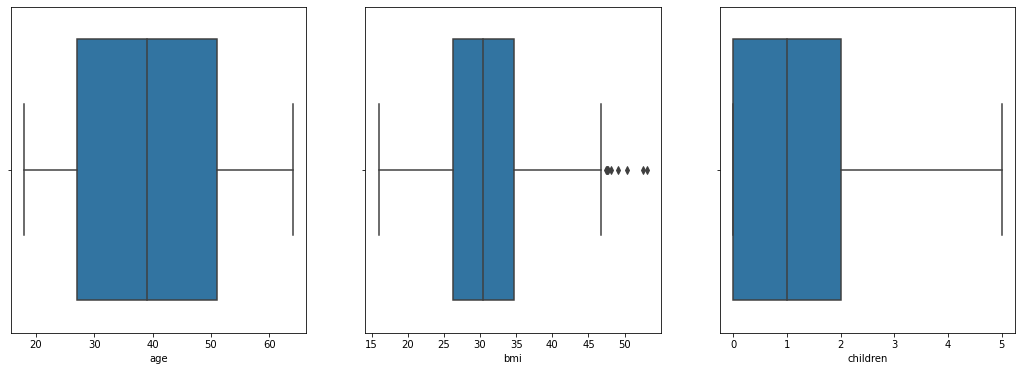

In [289]:
fig,axes = plt.subplots(1, 3,figsize=(18,6))

sns.boxplot(ax=axes[0],x='age',data=df)
sns.boxplot(ax=axes[1],x='bmi',data=df)
sns.boxplot(ax=axes[2],x='children',data=df)

In [290]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
iqr = Q3 - Q1

upper = np.where(df['bmi'] >= Q3 + 1.5 * iqr)
lower = np.where(df['bmi'] <= Q1 - 1.5 * iqr)

df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

# CORRELATION

<AxesSubplot:>

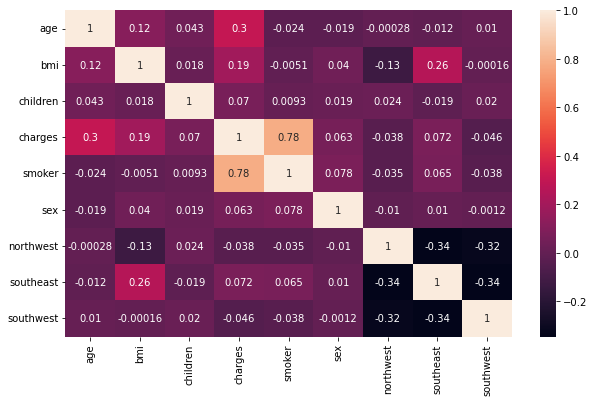

In [291]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# DARI HEATMAP TERSEBUT TIDAK TERLIHAT ADANYA MULRICOLINEARITY

<AxesSubplot:xlabel='southwest', ylabel='charges'>

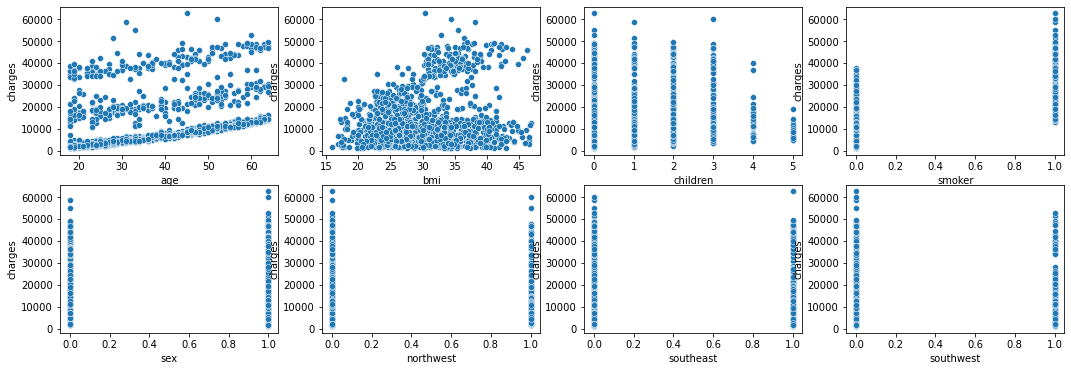

In [292]:
fig,axes = plt.subplots(2, 4,figsize=(18,6))

sns.scatterplot(ax=axes[0,0],x='age',y='charges',data=df)
sns.scatterplot(ax=axes[0,1],x='bmi',y='charges',data=df)
sns.scatterplot(ax=axes[0,2],x='children',y='charges',data=df)
sns.scatterplot(ax=axes[0,3],x='smoker',y='charges',data=df)
sns.scatterplot(ax=axes[1,0],x='sex',y='charges',data=df)
sns.scatterplot(ax=axes[1,1],x='northwest',y='charges',data=df)
sns.scatterplot(ax=axes[1,2],x='southeast',y='charges',data=df)
sns.scatterplot(ax=axes[1,3],x='southwest',y='charges',data=df)

Dari Scatterplot tersebut, dapat disimpulkan bahwa:
* Semakin Tua seseorang, maka charges akan semakin tinggi
* Semakin banyak anak seseorang, maka charges akan semakin rendah
* Charges akan meningkat jika seseorang merupakan perokok

Untuk data seperti BMI, Sex, dan region, tidak terdapat adanya hubungan yang besar/penting terhadap charges, untuk itu data tersebut akan di drop

In [293]:
df.drop(['sex', 'bmi', 'northwest','southeast','southwest'], axis=1,inplace=True)
df.head()

,age,children,charges,smoker
0,19,0,16884.92400,1
1,18,1,1725.55230,0
2,28,3,4449.46200,0
3,33,0,21984.47061,0
4,32,0,3866.85520,0


# PLOTTING CHARGES

Text(0.5, 1.0, 'After log transform')

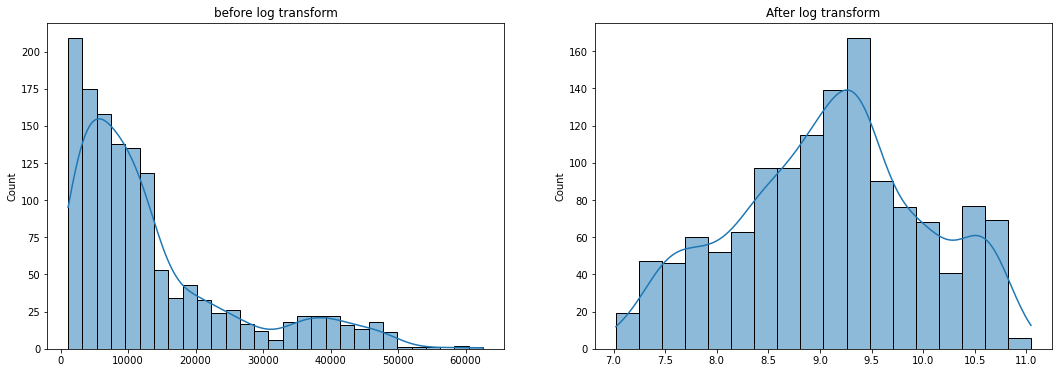

In [294]:
fig,axes = plt.subplots(1, 2,figsize=(18,6))
sns.histplot(ax=axes[0],x=df['charges'].values,kde=True).set_title("before log transform")
sns.histplot(ax=axes[1],x=np.log(df['charges'].values),kde=True).set_title("After log transform")

Dapat dilihat bahwa charges tidak memiliki distribusi yang normal, untuk mengatasi masalah ini, akan dilakukan log transform terhadap y

# TRAIN TEST SPLIT

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [296]:
X = pd.DataFrame(sc.fit_transform(df.drop('charges',axis=1))).values
y = df['charges'].values

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# LINEAR REGRESSION

In [298]:
import numpy as np

def MSE_count(y, y_predicted):
    length = len(y)
    sum_value = 0
    for i in range(length):
        sum_value += (y[i] - y_predicted[i])**2
    return sum_value/length

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_iters = self.n_iters
        loss = []

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw =  ( 2 * np.dot(X.T, (y_predicted - y))) / n_samples
            db = ( 2 * np.sum(y_predicted - y)) / n_samples
            loss.append(MSE_count(y, y_predicted))
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
        plt.plot(np.arange(1, n_iters), loss[1:])
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        
        return self.weights, self.bias
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

# TRAINING

In [299]:
LR = LinearRegression(lr=0.01, n_iters=200)

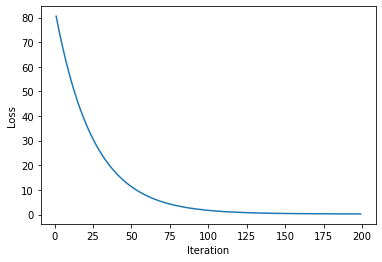

In [300]:
weights,bias = LR.fit(X_train,np.log(y_train))

weights = {'Features':[['Age'],['Children'],['Smoker']], 'Weights':weights}  

weight_list = pd.DataFrame(weights)

In [301]:
weight_list

,Features,Weights
0,[Age],0.471104
1,[Children],0.121878
2,[Smoker],0.617825


In [302]:
print('Bias =',bias)

Bias = 8.943284582789861


In [303]:
predictions = np.exp(LR.predict(X_test))
y_compare = {'y_original': y_test, 'y_pred':predictions}  
y_compare

{'y_original': array([14001.1338 , 14426.07385, 33900.653  ,  4751.07   , 12222.8983 ,
         8023.13545,  9788.8659 , 14394.5579 ,  8233.0975 ,  2464.6188 ,
        12231.6136 , 10560.4917 , 13012.20865, 20984.0936 , 25333.33284,
        12244.531  , 10407.08585,  4686.3887 ,  1515.3449 , 42303.69215,
         5148.5526 , 10579.711  ,  2331.519  , 17085.2676 ,  8211.1002 ,
        21098.55405,  2927.0647 ,  5979.731  ,  1627.28245,  6496.886  ,
        10115.00885,  9288.0267 ,  2850.68375, 13217.0945 , 42211.1382 ,
        11150.78   , 20009.63365, 18033.9679 , 18972.495  , 32548.3405 ,
         3490.5491 ,  7626.993  , 14349.8544 ,  4340.4409 ,  5974.3847 ,
         7731.85785,  8457.818  , 18310.742  , 42560.4304 ,  6796.86325,
        10602.385  , 12347.172  ,  8825.086  ,  3353.284  ,  2904.088  ,
         8932.084  , 13415.0381 ,  1261.442  , 24227.33724, 48517.56315,
         1704.70015,  4433.9159 ,  7804.1605 ,  8605.3615 ,  4133.64165,
         5327.40025,  3577.999  , 398

In [304]:
from sklearn import metrics
print('MAE =',metrics.mean_absolute_error(y_test,predictions))
print('MSE =',metrics.mean_squared_error(y_test,predictions))
print('RMSE =',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
print('MSE =',metrics.r2_score(y_test,predictions))

MAE = 3917.060901655979
MSE = 57057989.08133421
RMSE = 62.58642745560717
MSE = 0.5328952274043843


In [305]:
compare = pd.DataFrame(y_compare)
compare

,y_original,y_pred
0,14001.13380,13195.118028
1,14426.07385,3565.020532
2,33900.65300,14467.880284
3,4751.07000,4820.188995
4,12222.89830,9426.154571
...,...,...
261,2217.46915,2463.429632
262,28868.66390,53549.590038
263,20630.28351,8523.637618
264,13019.16105,10427.275411


# RESIDUAL HISTOGRAM

C:\Users\itosu\mambaforge\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


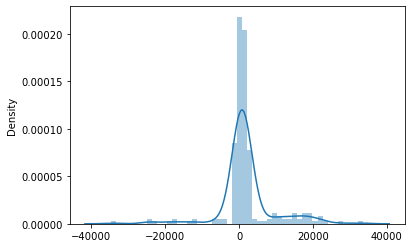

In [306]:
sns.distplot((y_test-predictions),bins=50);

**Dari histogram tersebut dapat dilihat bahwa error terdistribusi secara normal**

# SCATTERPLOT

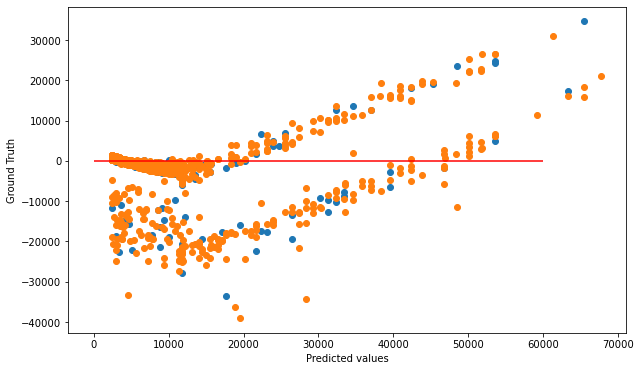

In [307]:
train_predict = np.exp(LR.predict(X_train))
plt.figure(figsize=(10,6))

plt.scatter(predictions,predictions - y_test)
plt.scatter(train_predict,train_predict - y_train)
plt.xlabel('Predicted values')
plt.ylabel('Ground Truth')
plt.hlines(y = 0, xmin = 0, xmax = 60000, color = 'red')
plt.show()